In [ ]:
# Observations
# There are more male mice than female in the study.
# Capomulin is an effective drug to treat cancer.
# Heavier mice seem to have a greater average tumor volume.


In [1]:
# Prepare Data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
%matplotlib inline

In [2]:
mouse_data = "D:\mouse_metadata.csv"
study_data = "D:\study_results.csv"

In [3]:
mouse_df = pd.read_csv(mouse_data)
study_df = pd.read_csv(study_data)

In [4]:
all_df = pd.merge(mouse_df, study_df, how = 'outer', on = 'Mouse ID' )

In [5]:
all_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
all_df.shape

(1893, 8)

In [7]:
# Unique mice IDs

all_df['Mouse ID'].value_counts()

g989    13
o287    10
j119    10
m550    10
g791    10
        ..
l872     1
o848     1
d133     1
t573     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
# Finding Duplicates

dup_df = all_df.set_index("Mouse ID")

In [9]:
dup_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [10]:
# New df to remove duplicate data

clean_df = dup_df.drop(['g989'])

In [11]:
clean_df.shape

(1880, 7)

In [12]:
# Updated # of mice IDs

clean_df2 = clean_df.reset_index()

In [13]:
clean_df2['Mouse ID'].value_counts()

o287    10
a897    10
s185    10
m550    10
g791    10
        ..
b447     1
x226     1
n482     1
x336     1
h428     1
Name: Mouse ID, Length: 248, dtype: int64

In [14]:
# Summary Stats including mean, median, variance, standard dev, and SEM of tumor vol

In [15]:
statsum  = clean_df2.groupby(["Drug Regimen"])

In [16]:
tum_mean = statsum["Tumor Volume (mm3)"].mean()

In [17]:
tum_med = statsum["Tumor Volume (mm3)"].median()

In [18]:
tum_var = statsum["Tumor Volume (mm3)"].var()

In [19]:
tum_sd = statsum["Tumor Volume (mm3)"].std()

In [20]:
tum_sem = statsum["Tumor Volume (mm3)"].sem()

In [21]:
statsum_df = pd.DataFrame({
    "Mean": tum_mean,
    "Median": tum_med,
    "Variance": tum_var,
    "Standard Deviation": tum_sd,
    "SEM": tum_sem
})
statsum_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# Bar and Pie Charts

In [23]:
bar_plot1_df = clean_df2.groupby(["Drug Regimen"])["Timepoint"].count()

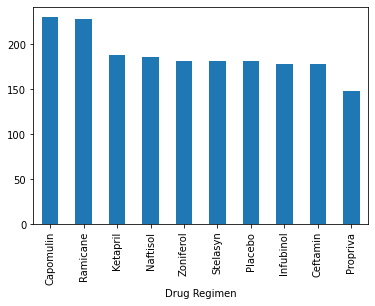

In [24]:
bar_plot1_df.sort_values(ascending = False).plot.bar()

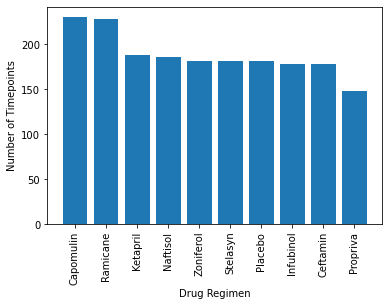

In [25]:
bar_plot2_df = bar_plot1_df.sort_values(ascending = False)
plt.bar(bar_plot2_df.index, bar_plot2_df.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints", size = 10)
plt.xticks(rotation = "vertical")
plt.show()

In [26]:
gender_df =  clean_df2["Sex"].value_counts()

Text(0, 0.5, '')

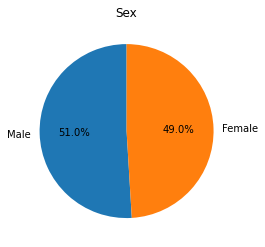

In [27]:
pie = gender_df.plot.pie(startangle = 90, autopct = "%1.1f%%", title = "Sex")
pie.set_ylabel('')

In [28]:
gender_df =  clean_df2["Sex"].value_counts()

Text(0.5, 1.0, 'Sex')

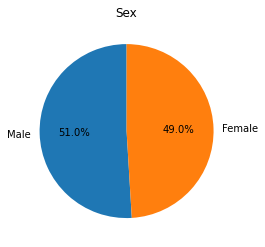

In [29]:
plt.pie(gender_df, labels = gender_df.index.values, startangle = 90, autopct = "%1.1f%%" )
plt.title("Sex")

In [30]:
# Quartiles, Outliers, and Box Plot

#Final Tumor volume of each mouse across top 4 treatment regimens

In [31]:
max_tp = clean_df2.groupby(["Mouse ID"])["Timepoint"].max()

In [32]:
max_tp_df = pd.DataFrame(max_tp)

In [33]:
max_df = pd.merge(clean_df2, max_tp_df, on = ("Mouse ID", "Timepoint"), how = 'right')

In [34]:
max_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [35]:
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [36]:
cap = []
ram = []
inf = []
cef = []

In [37]:
for index, row in max_df.iterrows():
    if row["Drug Regimen"]== regimens[0]:
        cap.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"]== regimens[1]: 
        ram.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"]== regimens[2]: 
        inf.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"]== regimens[3]: 
        cef.append(row["Tumor Volume (mm3)"])
    

In [38]:
drug_df = pd.DataFrame({
    regimens[0]: cap,
    regimens[1]: ram,
    regimens[2]: inf,
    regimens[3]: cef
})

In [39]:
drug_df_max = drug_df.max()

In [40]:
drug_df_min = drug_df.min()

In [41]:
drug_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


In [42]:
# Quartile, quantile, outliers, etc calculations for each drug

cap_quart = drug_df[regimens[0]].quantile([.25, .5, .75])
cap_low = cap_quart[.25]
cap_med = cap_quart[.5]
cap_upper = cap_quart[.75]
cap_iqr = cap_upper - cap_low
cap_lowb = cap_low - (1.5 * cap_iqr)
cap_upb = cap_upper + (1.5 * cap_iqr)
cap_max = drug_df[regimens[0]].max()
cap_min = drug_df[regimens[0]].min()

In [43]:
ram_quart = drug_df[regimens[1]].quantile([.25, .5, .75])
ram_low = ram_quart[.25]
ram_med = ram_quart[.5]
ram_upper = ram_quart[.75]
ram_iqr = ram_upper - ram_low
ram_lowb = ram_low - (1.5 * ram_iqr)
ram_upb = ram_upper + (1.5 * ram_iqr)
ram_max = drug_df[regimens[1]].max()
ram_min = drug_df[regimens[1]].min()

In [44]:
inf_quart = drug_df[regimens[2]].quantile([.25, .5, .75])
inf_low = inf_quart[.25]
inf_med = inf_quart[.5]
inf_upper = inf_quart[.75]
inf_iqr = inf_upper - inf_low
inf_lowb = inf_low - (1.5 * inf_iqr)
inf_upb = inf_upper + (1.5 * inf_iqr)
inf_max = drug_df[regimens[2]].max()
inf_min = drug_df[regimens[2]].min()

In [45]:
cef_quart = drug_df[regimens[3]].quantile([.25, .5, .75])
cef_low = cef_quart[.25]
cef_med = cef_quart[.5]
cef_upper = cef_quart[.75]
cef_iqr = cef_upper - cef_low
cef_lowb = cef_low - (1.5 * cef_iqr)
cef_upb = cef_upper + (1.5 * cef_iqr)
cef_max = drug_df[regimens[3]].max()
cef_min = drug_df[regimens[3]].min()

In [46]:
# out_count = 

In [47]:
outliers = pd.DataFrame({
    "Drug": regimens,
    "Lower Bounds": [cap_low, ram_low, inf_low, cef_low],
    "Upper Bounds": [cap_upper, ram_upper, inf_upper, cef_upper],
    "IQR": [cap_iqr, ram_iqr, inf_iqr, cef_iqr],
      
})
out_merge = outliers.groupby("Drug")
out_merge.sum()

,Lower Bounds,Upper Bounds,IQR
Drug,,,
Capomulin,32.377357,40.159220,7.781863
Ceftamin,48.722078,64.299830,15.577752
Infubinol,54.048608,65.525743,11.477135
Ramicane,31.560470,40.659006,9.098537


In [48]:
# Box Plots

In [49]:
box_plot = [drug_df[regimens[0]],
            drug_df[regimens[1]],
            drug_df[regimens[2]],
            drug_df[regimens[3]]
           ]

<function matplotlib.pyplot.show(*args, **kw)>

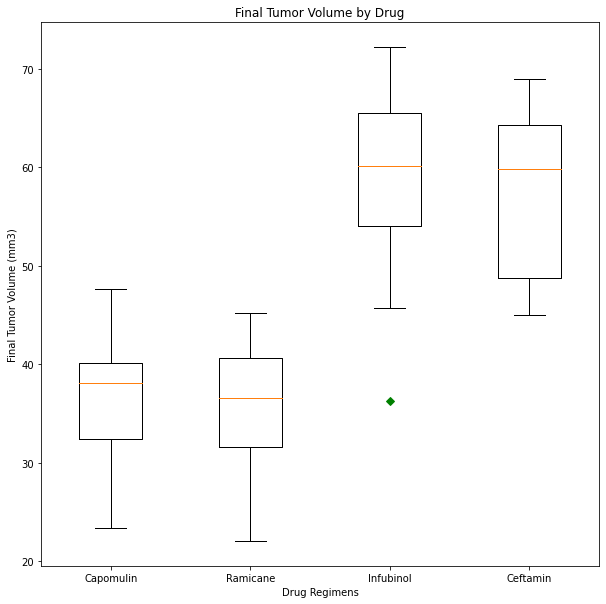

In [50]:
fig1, ax = plt.subplots(figsize = (10, 10))
ax.boxplot(box_plot, 0, 'gD')
plt.title("Final Tumor Volume by Drug")
plt.xlabel("Drug Regimens")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks ([1, 2, 3, 4], regimens)
plt.show

In [51]:
# Line and Scatter Plots

In [52]:
lplot_df = clean_df2.loc[clean_df2["Mouse ID"] == "w914",:]
# lplot_df

In [53]:
x_axis = lplot_df["Timepoint"]

In [54]:
tum_vol = lplot_df["Tumor Volume (mm3)"]

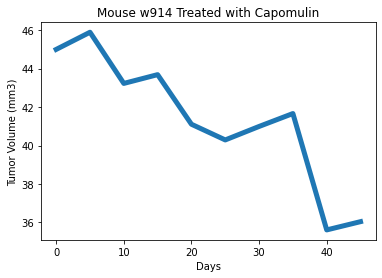

In [55]:
plt.title("Mouse w914 Treated with Capomulin")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, tum_vol, linewidth = 5, markersize = 10)
plt.show()

In [56]:
cap_df = clean_df2.loc[clean_df2["Drug Regimen"] == "Capomulin",:]

In [57]:
cap_avg = cap_df.groupby(["Mouse ID"]).mean()

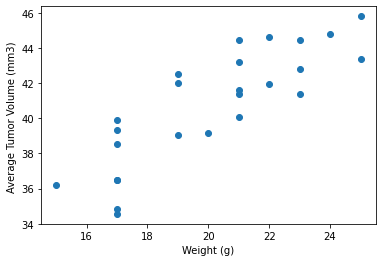

In [58]:
plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3) ")
plt.show()

In [59]:
# Calculate Correlation and Regresssion

cap_df = clean_df2.loc[clean_df2["Drug Regimen"] == "Capomulin",:]
cap_avg = cap_df.groupby(["Mouse ID"]).mean()

In [60]:
corr_reg = round(st.pearsonr(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])[0], 2)

In [62]:
a = st.linregress(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
print(a)

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.12754359033201337)


In [64]:
slope = 0.9544396890241045
intercept = 21.552160532685015

In [65]:
line = slope * (cap_avg["Weight (g)"]) + intercept

Text(0, 0.5, 'Tumor Volume (mm3)')

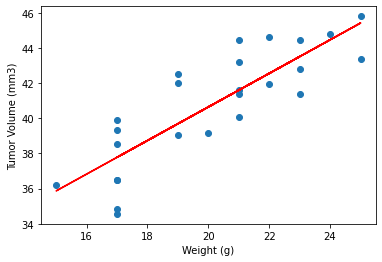

In [70]:
plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.plot(cap_avg["Weight (g)"], line, "r", label = "y = {:.2f}x + {:2f}".format(slope, intercept))
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")